
The following command must be run outside of the IPython shell:

    $ pip install matplotlib

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.sql import label

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
print(Measurement)

<class 'sqlalchemy.ext.automap.measurement'>


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

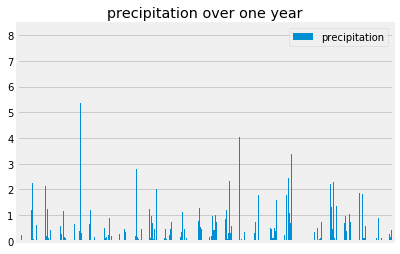

In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
results = session.query(Measurement.date, Measurement.prcp).all()
date_p = [result[0] for result in results]
precip_p = [result[1] for result in results]

#Converts dates to datetime objects
date_conv = [datetime.strptime(d, "%Y-%m-%d") for d in date_p]

#Remove entries more than a year old
last_date = date_conv[-1]
year_ago = last_date - dt.timedelta(days=365)

#storage lists
d_oneyear = []

for d in date_conv:
    if (last_date - d).days < 366:
        d_oneyear.append(d)

counter = len(d_oneyear)

p_oneyear = precip_p[-counter:]
        

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

oneyear_pd = pd.DataFrame({'date': d_oneyear,
                           'precipitation': p_oneyear})
oneyear_pd.set_index("date")
# Sort the dataframe by date
oneyear_pd.sort_values(by="date")
oneyear_pd.head()

# Use Pandas Plotting with Matplotlib to plot the data

oneyear_pd.plot(x="date", y="precipitation", kind='bar', title="precipitation over one year")
ax1 = plt.axes()
ax1.axes.get_xaxis().set_visible(False)

In [12]:
len(p_oneyear)

2230

In [13]:
# Calculate the date 1 year ago from the last data point in the database

last_date = date_conv[-1]
year_ago = last_date - dt.timedelta(days=365)
print(year_ago)

2016-08-23 00:00:00


![precipitation](Images/precipitation.png)

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
oneyear_pd.describe()

,precipitation
count,2111.000000
mean,0.439479
std,0.723091
min,0.000000
25%,0.010000
50%,0.160000
75%,0.555000
max,8.060000


![describe](Images/describe.png)

In [15]:
# Design a query to show how many stations are available in this dataset?
results2 = session.query(Station.station).all()
stations = [r[0] for r in results2]
len(stations)


9

In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
results3 = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).all()
print(results3)

[('USC00511918', 1979), ('USC00513117', 2709), ('USC00514830', 2202), ('USC00516128', 2612), ('USC00517948', 1372), ('USC00518838', 511), ('USC00519281', 2772), ('USC00519397', 2724), ('USC00519523', 2669)]


In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.max(Measurement.tobs).label("Maximum Temp"), func.min(Measurement.tobs).label("Minimum Temp"), func.avg(Measurement.tobs).label("Average Temp")).filter(Measurement.station == "USC00519281").all()

[(85.0, 54.0, 71.66378066378067)]

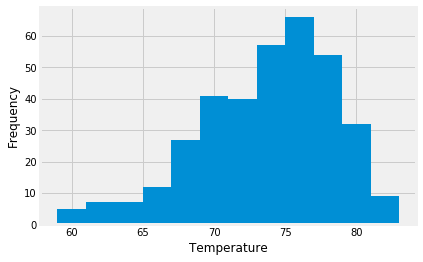

In [33]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
histogram_db = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == "USC00519281")
date_h = [d[0] for d in histogram_db]
temp_h = [t[1] for t in histogram_db]

date_h_c = [datetime.strptime(d, "%Y-%m-%d") for d in date_h]
last_date2 = date_h_c[-1]
year_ago2 = last_date2 - dt.timedelta(days=365)

date_h_1yr = []

for d in date_h_c:
    if (last_date2 - d).days < 366:
        date_h_1yr.append(d)

counter2 = len(date_h_1yr)

temp_h_1yr = temp_h[-counter2:]


plt.hist(temp_h_1yr, bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()



![precipitation](Images/station-histogram.png)

In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [30]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2017-02-28', '2017-03-05'))

[(64.0, 72.02777777777777, 78.0)]


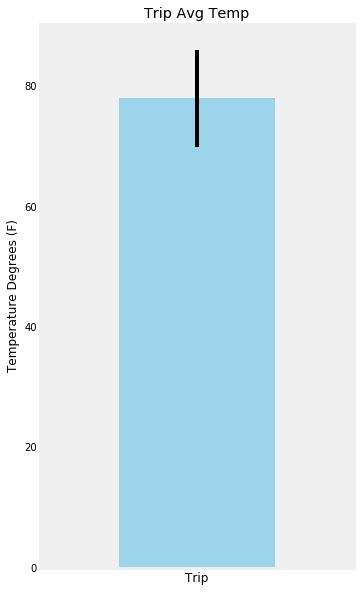

In [51]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trips = pd.DataFrame(calc_temps('2017-02-28', '2017-03-05'), columns=["Min", "Max", "Avg"])
avg_temp = trips["Avg"]
min_temp = trips["Min"]
max_temp = trips["Max"]
diff_temp = max_temp - min_temp
avg_temp.plot(kind='bar', yerr=diff_temp, alpha=0.8, color='skyblue', figsize=(5,10))
plt.title("Trip Avg Temp")
plt.ylabel("Temperature Degrees (F)")
plt.xlabel("Trip")
plt.xticks([])
plt.grid()
plt.show()

In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

rps_db = session.query(Measurement.station, func.avg(Measurement.tobs))

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


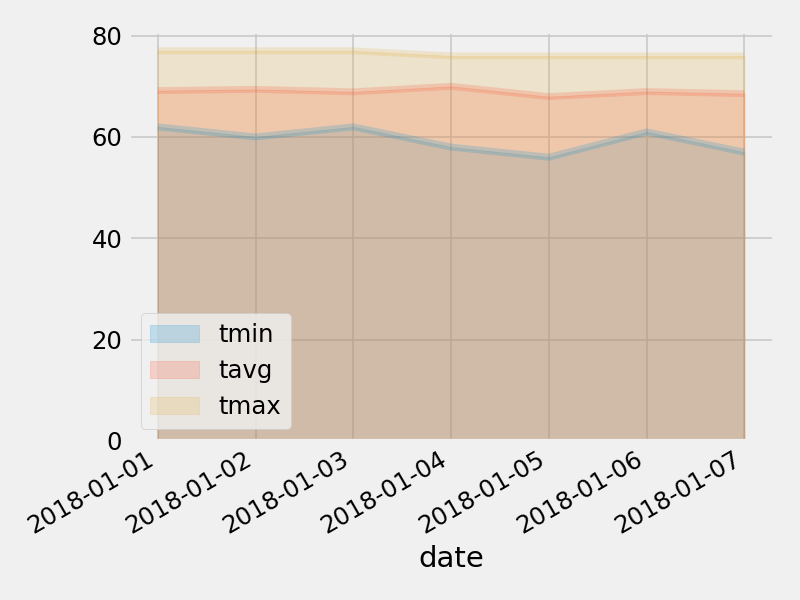

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
